A maior parte dos códigos que estão abaixo são adaptações de exemplos que existem nas diversas bibliotecas do Python

Terão de ter a capacidade de pesquisarem e adaptarem.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
import seaborn as sns

Chamar os dados da iris

In [2]:
dados = sns.load_dataset('iris')
dados.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vários modos de matriz de diagramas de dispersão do seaborn

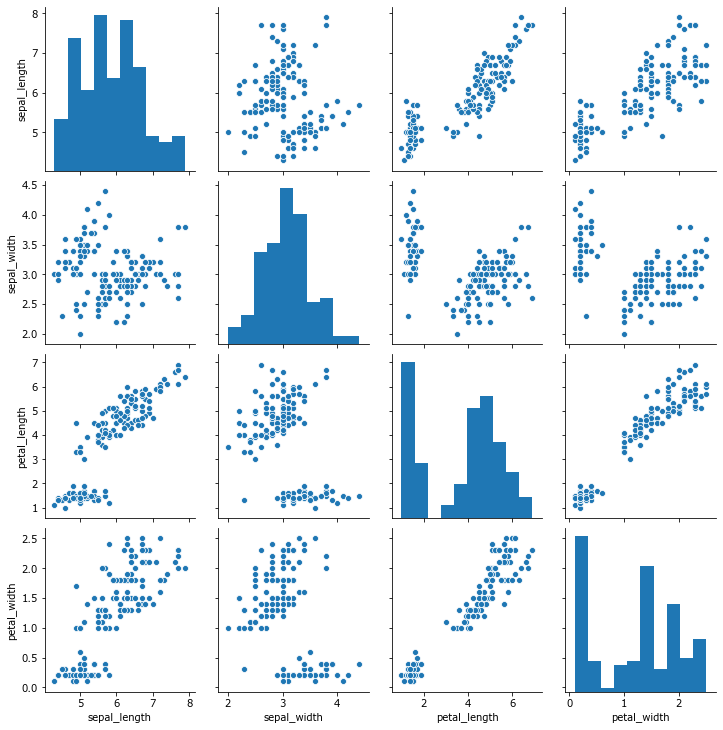

In [3]:
sns.pairplot(dados)
plt.show()

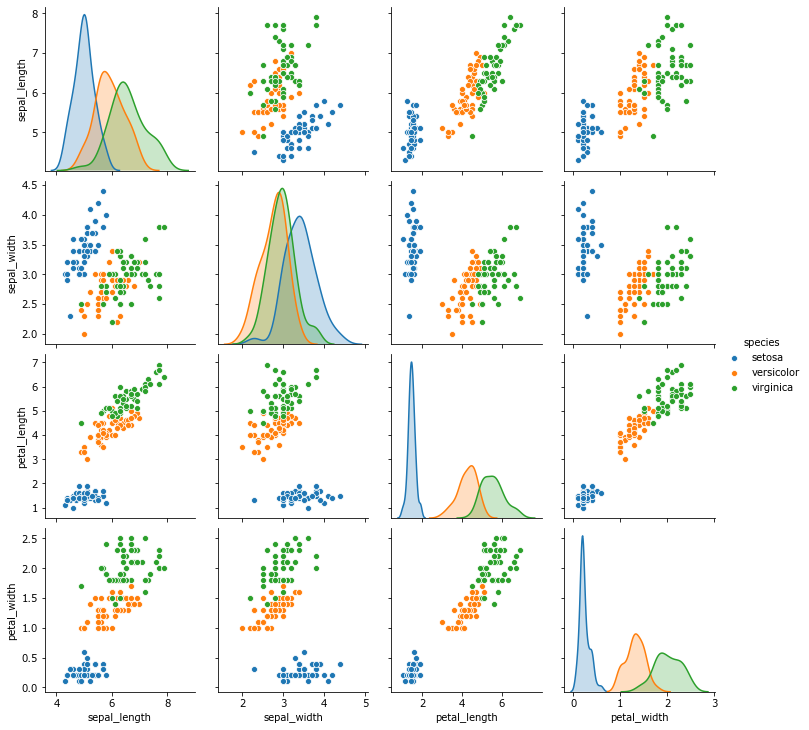

In [4]:
sns.pairplot(dados,hue='species',diag_kind='kde')
plt.show()

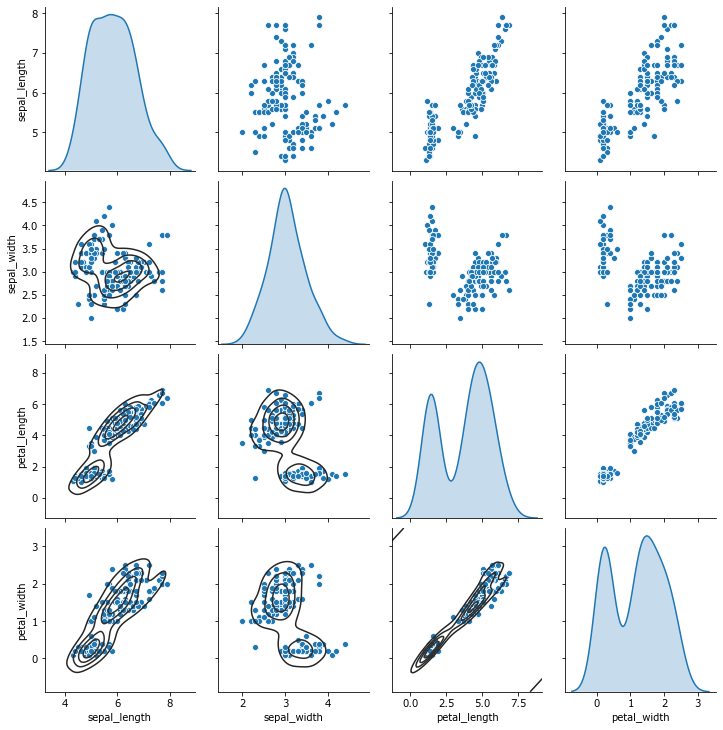

In [5]:
g = sns.pairplot(dados, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

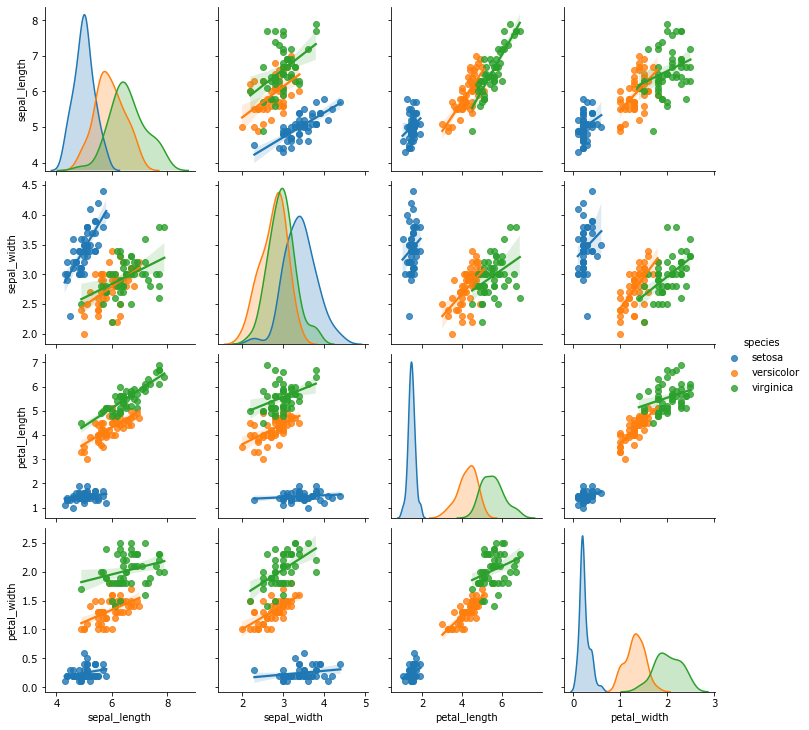

In [6]:
sns.pairplot(dados,kind='reg',hue='species')
plt.show()

Coordenadas paralelas

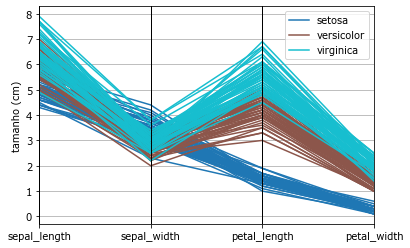

In [7]:
parallel_coordinates(dados, 'species', colormap=plt.get_cmap("tab10"))
plt.ylabel('tamanho (cm)')
plt.show()

Spyder plot (reparar que seis flores já fazem muita confusao)

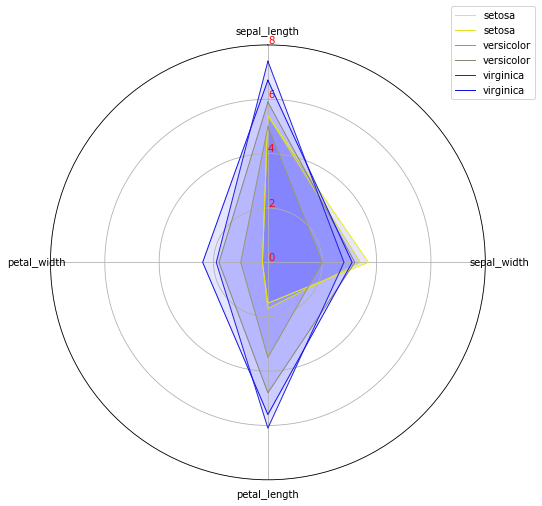

In [8]:
from math import pi
categories = list(dados)[:4] # escolher as primeiras 4 variáveis
N = len(categories) # número de eixos

angles = [ n / float(N)*2*pi for n in range(N)] # determinar os ângulos
angles = angles + angles[:1] # repetir o primeiro ângulo

plt.figure(figsize = (8,8))
ax = plt.subplot(111,polar = True)

ax.set_theta_offset(pi/2) # ângulo de início de variáveis (experimentar com pi/4)
ax.set_theta_direction(-1) # orientada negativa (lembram-se de AMIII)
plt.xticks(angles[:-1],categories) # as linhas de cada variável
ax.set_rlabel_position(0) # para que os ticks fiquem na posição pi/2
plt.yticks([0,2,4,6,8],["0","2","4","6","8"],color= "red", size = 10)
plt.ylim(0,8)

selected = [10,20,60,70,130,140] # selecionar algumas instâncias

for flor in selected: # plot de cada instância
    values = dados.loc[flor].drop("species").values.flatten().tolist()
    values = values + values[:1]
    ax.plot(angles,values,linewidth = 1,linestyle="solid",label = dados.species.loc[flor],
                         c=(1-flor/150,1-flor/150,flor/150,1) )
    ax.fill(angles,values,"b",alpha=0.1)

plt.legend(loc = "upper left",bbox_to_anchor = (0.91,1.1)) # localização da legenda
plt.show()

Aplicação de PCA aos dados

In [9]:
from sklearn.decomposition import PCA, FastICA

for i in range(4):
    pca = PCA(n_components=i+1)
    pca.fit(dados.drop(columns='species'))
    print('Variância explicada por PC')
    print(pca.explained_variance_ratio_)
    print('Variância total')
    print(pca.explained_variance_ratio_.sum())

dados_pca = dados.copy()
pca = PCA(n_components=4)
pca.fit(dados.drop(columns='species'))

dados_pca['C1'] = pca.transform(dados.drop(columns='species'))[:,0]
dados_pca['C2'] = pca.transform(dados.drop(columns='species'))[:,1]

dados_pca.head()

Variância explicada por PC
[0.92461872]
Variância total
0.9246187232017271
Variância explicada por PC
[0.92461872 0.05306648]
Variância total
0.9776852063187949
Variância explicada por PC
[0.92461872 0.05306648 0.01710261]
Variância total
0.9947878161267246
Variância explicada por PC
[0.92461872 0.05306648 0.01710261 0.00521218]
Variância total
1.0


,sepal_length,sepal_width,petal_length,petal_width,species,C1,C2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


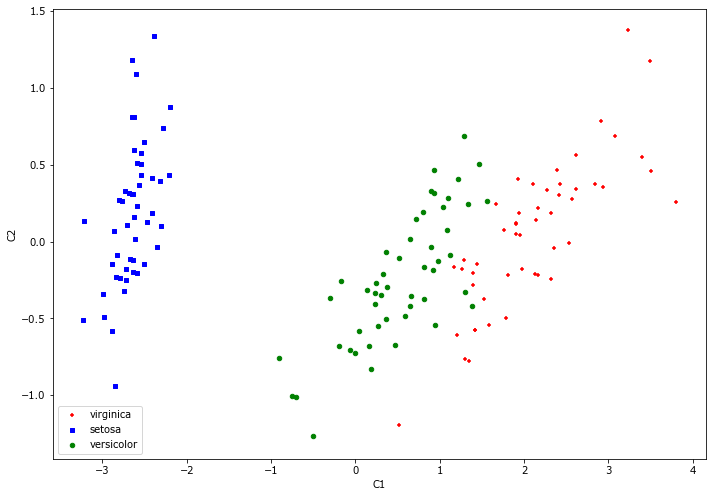

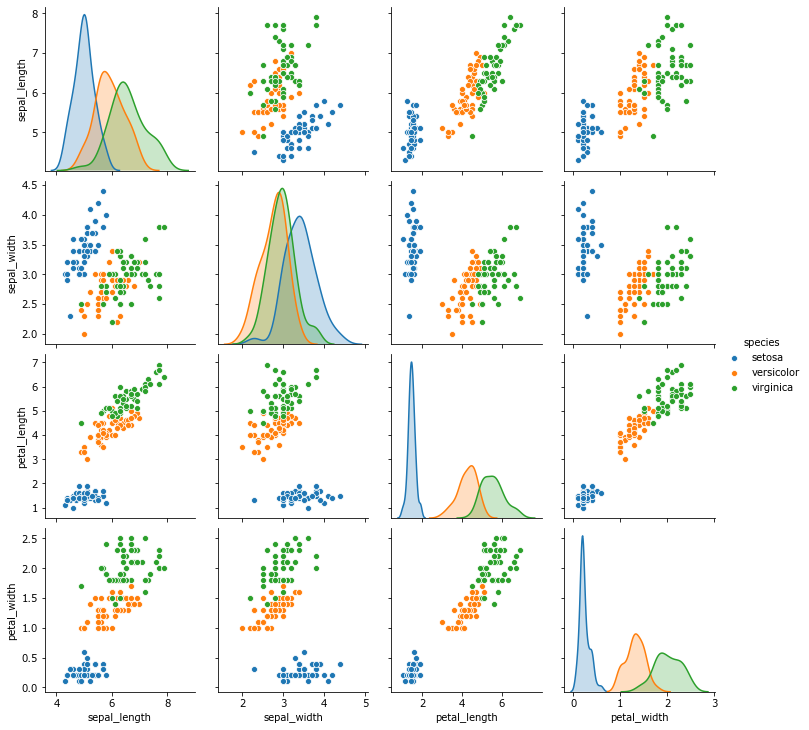

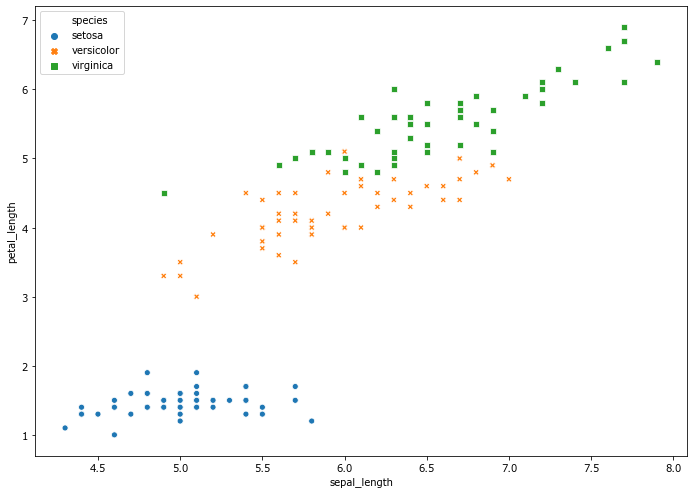

In [10]:
dados_pca_groups = dados_pca[['C1','C2','species']].groupby('species')

fig, ax = plt.subplots(figsize=(11.7, 8.27))
dados_pca_groups.get_group('virginica').plot.scatter(x='C1', y='C2', label='virginica',color='red',ax=ax,marker="+")
dados_pca_groups.get_group('setosa').plot.scatter(x='C1', y='C2', label='setosa',color='blue',ax=ax,marker="s")
dados_pca_groups.get_group('versicolor').plot.scatter(x='C1', y='C2', label='versicolor',color='green',ax=ax,marker="o")
plt.show()

sns.pairplot(dados,hue='species')
plt.show()

fig, ax1 = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(ax=ax1,data=dados,x='sepal_length',y='petal_length',hue='species',style='species')

Independent component analysis

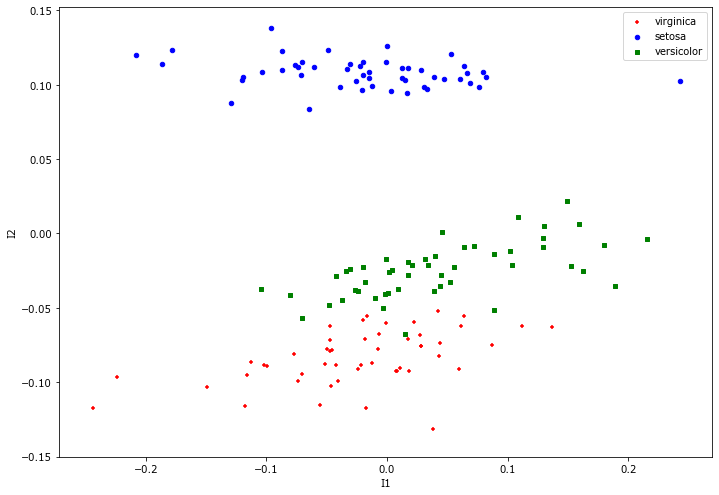

In [11]:
transformer = FastICA(n_components=4, random_state=0)
ICA = transformer.fit_transform(dados.drop(columns='species'))

dados_ica = dados.copy()

dados_pca['I1'] = ICA[:,0]
dados_pca['I2'] = ICA[:,1]

dados_pca_groups = dados_pca[['I1','I2','species']].groupby('species')

fig, ax = plt.subplots(figsize=(11.7, 8.27))
dados_pca_groups.get_group('virginica').plot.scatter(ax=ax,x='I1', y='I2', label='virginica',color='red',marker='+')
dados_pca_groups.get_group('setosa').plot.scatter(x='I1', y='I2', label='setosa',color='blue',ax=ax,marker='o')
dados_pca_groups.get_group('versicolor').plot.scatter(x='I1', y='I2', label='versicolor',color='green',ax=ax,marker='s')
plt.show()

Os coeficientes da combinação linear dos pca

In [12]:
parametros = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4'],index=list(dados)[0:-1])
print(parametros)

ica=FastICA(n_components=4, random_state=0)

ica.fit(dados.drop(columns='species'))
parametros2 = pd.DataFrame(ica.components_.T,columns=['ICA1','ICA2','ICA3','ICA4'],index=list(dados)[:-1])
print(parametros2)

parametros3 = pca.components_.T * np.sqrt(pca.explained_variance_)

matriz_de_variancia_explicada = pd.DataFrame(parametros3, columns=['PC1', 'PC2', 'PC3','PC4'], index=list(dados)[:-1])
print(matriz_de_variancia_explicada) # estabelece a correlação entre a variável original e a PC correspondente

                   PC1       PC2       PC3       PC4
sepal_length  0.361387  0.656589 -0.582030 -0.315487
sepal_width  -0.084523  0.730161  0.597911  0.319723
petal_length  0.856671 -0.173373  0.076236  0.479839
petal_width   0.358289 -0.075481  0.545831 -0.753657
                  ICA1      ICA2      ICA3      ICA4
sepal_length  0.054743  0.018985  0.254373  0.034105
sepal_width  -0.242097  0.002732 -0.121158 -0.030331
petal_length -0.083177 -0.047673 -0.145778 -0.192053
petal_width   0.078877 -0.014227  0.079751  0.416028
                   PC1       PC2       PC3       PC4
sepal_length  0.743108  0.323446 -0.162770 -0.048707
sepal_width  -0.173801  0.359689  0.167212  0.049361
petal_length  1.761545 -0.085406  0.021320  0.074081
petal_width   0.736739 -0.037183  0.152647 -0.116354


Multidimensional Scaling

In [13]:
from sklearn.manifold import MDS

proj = MDS(n_components=2)

X_MDS = proj.fit_transform(dados.drop(columns=['species']))
dados_MDS=dados.copy()

dados_MDS['M1'] = X_MDS[:,0]
dados_MDS['M2'] = X_MDS[:,1]
dados_MDS

,sepal_length,sepal_width,petal_length,petal_width,species,M1,M2
0,5.1,3.5,1.4,0.2,setosa,-2.649523,-0.561501
1,4.9,3.0,1.4,0.2,setosa,-2.732287,-0.080912
2,4.7,3.2,1.3,0.2,setosa,-2.906522,-0.161773
3,4.6,3.1,1.5,0.2,setosa,-2.776968,0.043454
4,5.0,3.6,1.4,0.2,setosa,-2.697347,-0.586108
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.999152,-0.028452
146,6.3,2.5,5.0,1.9,virginica,1.483542,0.507150
147,6.5,3.0,5.2,2.0,virginica,1.776800,0.145582
148,6.2,3.4,5.4,2.3,virginica,1.977457,0.709357


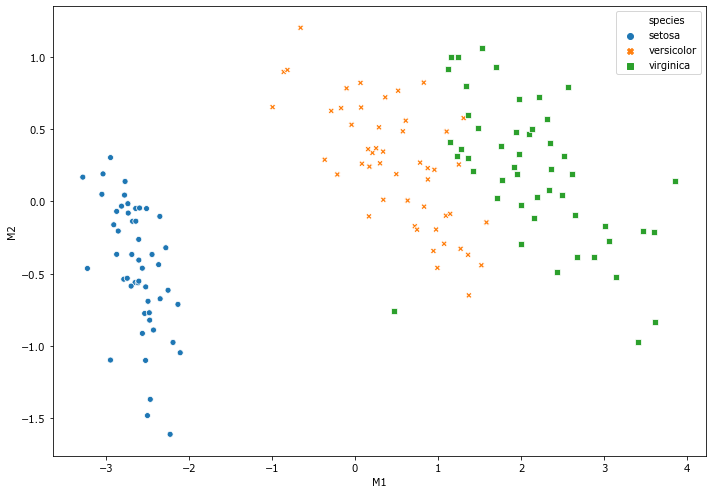

In [14]:
fig, ax1 = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(ax=ax1,data=dados_MDS,x='M1',y='M2',hue='species',style='species')

Escolher os selecionados em python e ver num spyder plot

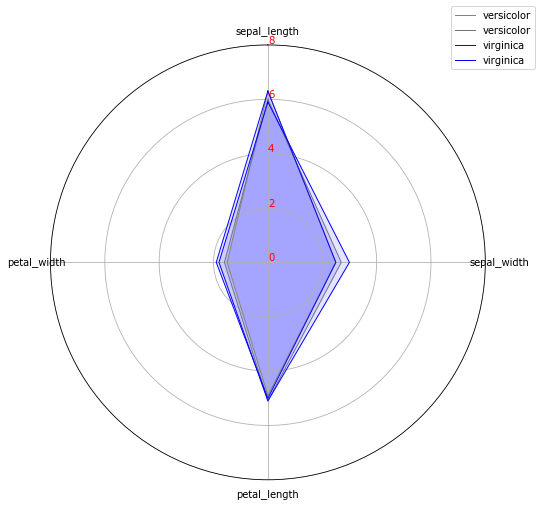

In [15]:
selected = [72,83,146,149]

plt.figure(figsize = (8,8))
ax = plt.subplot(111,polar = True)

ax.set_theta_offset(pi/2) # ângulo de início de variáveis (experimentar com pi/4)
ax.set_theta_direction(-1) # orientada negativa (lembram-se de AMIII)
plt.xticks(angles[:-1],categories) # as linhas de cada variável
ax.set_rlabel_position(0) # para que os ticks fiquem na posição pi/2
plt.yticks([0,2,4,6,8],["0","2","4","6","8"],color= "red", size = 10)
plt.ylim(0,8)

for flor in selected: # plot de cada instância
    values = dados.loc[flor].drop("species").values.flatten().tolist()
    values = values + values[:1]
    ax.plot(angles,values,linewidth = 1,linestyle="solid",label = dados.species.loc[flor],
                         c=(1-flor/150,1-flor/150,flor/150,1) )
    ax.fill(angles,values,"b",alpha=0.1)

plt.legend(loc = "upper left",bbox_to_anchor = (0.91,1.1)) # localização da legenda
plt.show()

Interessante: Podemos utilizar um método de previsão para pintar por tipo de iris as zonas do PC1 e PC2.

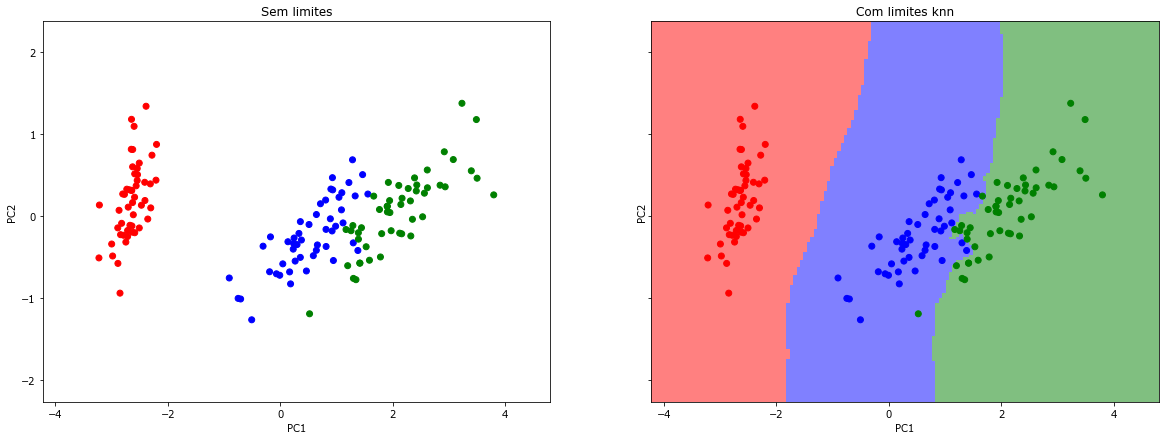

In [16]:

from matplotlib.colors import ListedColormap
from sklearn import neighbors

points = np.array(dados_pca[['C1','C2']])
species = dados.species

groups = []

for specie in species:
    if specie == 'setosa':
        groups.append(0)
    elif specie == 'versicolor':
        groups.append(1)
    else:
        groups.append(2)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7), sharey=True, sharex=True)
cmap = ListedColormap(['red', 'blue', 'green'])
ax1.scatter(points[:, 0], points[:, 1], c=groups, cmap=cmap)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title('Sem limites')
ax2.scatter(points[:, 0], points[:, 1], c=groups, cmap=cmap)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Com limites knn')

clf = neighbors.KNeighborsClassifier(2)
clf.fit(points, groups)

x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                     np.linspace(y_min, y_max, 150))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.imshow(Z, extent=[x_min, x_max, y_min, y_max], cmap=cmap, alpha=0.5, aspect='auto', origin='lower')
plt.show()

